# Midterm Project

The midterm project is designed to let you apply what you have learned so far, and demonstrate that you have mastered it. The submission will be graded on the correctness of the execution of your analysis (50%), the ambitiousness of the problems chosen (30%), and the creativity of your questions and solutions (20%).

Please note that the project is *individual*, and the solutions will be checked for substantial overlap. However, you should feel free to discuss problems and ideas with your class mates, just do not share code.

Your submission should include all outputs and be self-contained, so it can be executed if necessary.


## Submission
The project is due on March 29, 23:59 CET. Late submissions will not be considered, and graded as 0. To submit, please:

1. rename this file with your student ID
2. copy this file and all additional data into a folder with your student ID
3. zip the folder
4. upload to Blackboard and send a copy or link to a copy of the zip file to Tommaso Fornaciari <fornaciari@unibocconi.it>

## Data and Preprocessing (5 pts)

Pick a data set, either from the ones we have used in class, or one that you have found yourself (up to 2 bonus points, depending on size and complexity).
Briefly (max. 100 words!) describe the content and type of the data set (book, reviews, Twitter, ...). 

Preprocess the data and explain (max. 200 words) which preprocessing steps you chose and why, and give statistics of the number of documents, types, and tokens, before and after preprocessing.

In [1]:
# merge the files in dataset into one txt file
import os
root='/Users/yeweiting/Downloads/aclImdb/train/unsup'
filelist=os.listdir('/Users/yeweiting/Downloads/aclImdb/train/unsup')
root1='/Users/yeweiting/Downloads/aclImdb/train/pos'
filelist1=os.listdir('/Users/yeweiting/Downloads/aclImdb/train/pos')
root2='/Users/yeweiting/Downloads/aclImdb/train/neg'
filelist2=os.listdir('/Users/yeweiting/Downloads/aclImdb/train/neg')

with open('unsup_file.txt','a+',encoding='utf-8') as newfile:
    for file in filelist:
        txt=open(os.path.join(root,file),encoding='utf-8')
        newfile.write(txt.read()+"\n")
newfile.close()

with open('pos_file.txt','a+',encoding='utf-8') as newfile:
    for file in filelist1:
        txt=open(os.path.join(root1,file),encoding='utf-8')
        newfile.write(txt.read()+"\n")
newfile.close()

with open('neg_file.txt','a+',encoding='utf-8') as newfile:
    for file in filelist2:
        txt=open(os.path.join(root2,file),encoding='utf-8')
        newfile.write(txt.read()+"\n")
newfile.close()

##### Dataset Description:

Here I choose a dataset which contains movie reviews along with their associated binary sentiment polarity labels. 

The core dataset contains 50,000 reviews split evenly into 25k training and 25k test sets. The overall distribution of labels is balanced (25k pos and 25k neg). There are also additional 50,000 unlabeled documents for unsupervised learning. 

Here to accelerate the processing time, I concatunate the positive and negative reviews in the training set (25,000 in all) and decide to use their sentiment labels as the category in carrying out latent topics analysis.

In [2]:
#read the files of positive and negative reviews inspectively and export the files into a dataframe
import pandas as pd
pos_reviews = [line.strip() for line in open('/Users/yeweiting/Downloads/NLP/pos_file.txt', encoding='utf8')]
df_pos = pd.DataFrame(pos_reviews,columns=["review"])
df_pos['attitude']='positive'

In [3]:
neg_reviews = [line.strip() for line in open('/Users/yeweiting/Downloads/NLP/neg_file.txt', encoding='utf8')]
df_neg = pd.DataFrame(neg_reviews,columns=["review"])
df_neg['attitude']='negative'

In [4]:
# concatenate the reviews and also keep the attitude
df = pd.concat([df_pos,df_neg], axis=0, join='inner', ignore_index=True)
df.head()

,review,attitude
0,For a movie that gets no respect there sure ar...,positive
1,Bizarre horror movie filled with famous faces ...,positive
2,"A solid, if unremarkable film. Matthau, as Ein...",positive
3,It's a strange feeling to sit alone in a theat...,positive
4,"You probably all already know this by now, but...",positive


In [5]:
df.tail()

,review,attitude
24995,"My comments may be a bit of a spoiler, for wha...",negative
24996,"The ""saucy"" misadventures of four au pairs who...",negative
24997,"Oh, those Italians! Assuming that movies about...",negative
24998,Eight academy nominations? It's beyond belief....,negative
24999,"Not that I dislike childrens movies, but this ...",negative


In [6]:
df.shape

(25000, 2)

In [7]:
#count the number of tokens
import spacy

nlp = spacy.load('en', disable=['tagger', 'parser', 'ner'])

documents = df.review.apply(str).tolist()
tokens = [token.text for sentence in documents[:25000] for token in nlp(sentence)]
len(tokens)

6810246

In [8]:
import nltk
import matplotlib.pyplot as plt
freq = nltk.FreqDist(tokens)

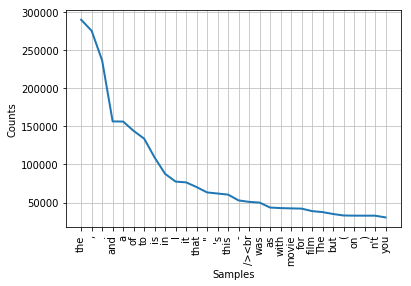

In [9]:
freq.plot(30, cumulative=False)

##### Before preprocessing the data, we have 25000 documents with 6810246 tokens including duplicate words. 
And from the plotting of the token frequency, we see that there are many meaningless punctuations and prepositions.

Now we apply data cleaning.

We should get rid of the stopwords, punctuations, digits, and both the most and the least frequent 40 words. 

In [10]:
# count the number of words in each document
df['word_count']=df['review'].apply(lambda x:len(str(x).split(" ")))
# count the number of characters in each document
df['char_count']=df['review'].str.len()

# delete the stopwords
from nltk.corpus import stopwords
stop=stopwords.words('english')
df['stopwords']=df['review'].apply(lambda sen:len([x for x in sen.split() if x in stop]))
df['review']=df['review'].apply(lambda sen:" ".join(x for x in sen.split() if x not in stop))

# transform into lower-case and delete the punctuations and digits in each document
df['review']=df['review'].apply(lambda sen:" ".join(x.lower() for x in sen.split()))
df['review'] = df['review'].str.replace('[^\w\s]','')
df['review']=df['review'].apply(lambda sen:" ".join(x for x in sen.split() if not x.isdigit()))

# calculate the average length of word in each document
def avg_word(sentence):
    words=sentence.split()
    return (sum(len(word) for word in words)/len(words))

df['avg_word']=df['review'].apply(lambda x:avg_word(x))

In [11]:
df.head()

,review,attitude,word_count,char_count,stopwords,avg_word
0,for movie gets respect sure lot memorable quot...,positive,52,284,19,5.424242
1,bizarre horror movie filled famous faces stole...,positive,166,1033,57,6.443396
2,a solid unremarkable film matthau einstein won...,positive,55,318,25,6.000000
3,its strange feeling sit alone theater occupied...,positive,442,2596,163,5.716364
4,you probably already know now additional episo...,positive,144,783,59,5.268293


According to the zipf distribution of words, the most frequent words would far surpass the others in terms of word frequency. Meanwhile, these usually are useless words that contain no sentimental tendency. So, we'd better get rid of them.

In [12]:
most_freq=pd.Series(' '.join(df['review']).split()).value_counts()[:50].index.tolist()
df['review']=df['review'].apply(lambda sen:' '.join(x for x in sen.split() if x not in most_freq))

The least frequent words may be proper nouns, entity names or words derived from other languages. They are not of much value to our analysis. We should get rid of them as well.

In [13]:
least_freq = pd.Series(' '.join(df['review']).split()).value_counts()[-10:].index.tolist()
df['review'] = df['review'].apply(lambda x: " ".join(x for x in x.split() if x not in least_freq))

By now, we have performed a brief cleaning of the data. Let's see how it turns out to be.

In [14]:
documents = df.review.apply(str).tolist()
print(documents[1])

bizarre horror filled famous faces stolen cristina raines later tvs flamingo road pretty somewhat unstable model gummy smile slated pay attempted suicides guarding gateway hell scenes raines modeling captured mood music perfect deborah raffin charming cristinas pal raines moves creepy brooklyn heights brownstone inhabited blind priest top floor things start cooking neighbors including fantastically wicked burgess meredith kinky couple sylvia miles beverly dangelo diabolical lot eli wallach fun wily police detective nearly crosspollination rosemarys baby exorcistbut combination based bestseller jeffrey konvitz sentinel entertainingly spooky full shocks brought director michael winner mounts thoughtfully downbeat ending skill


In [15]:
tokens = [token.text for sentence in documents[:25000] for token in nlp(sentence)]
len(tokens)

2747721

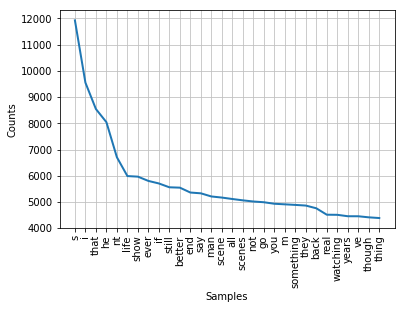

In [16]:
freq2 = nltk.FreqDist(tokens)
freq2.plot(30, cumulative=False)

##### The distribution seems more balanced now in terms of the diminished differences in y-axis "Counts".

##### After preprocessing the data, we now have 25000 documents with 2747721 tokens including duplicate words.

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(analyzer='word', min_df=0.001, max_df=0.75, stop_words='english', sublinear_tf=True)

X = tfidf_vectorizer.fit_transform(documents)

In [18]:
X.shape # indicating 25000 documents with 10144 features

(25000, 10144)

##### After preprocessing the data, we now have 25000 documents with 10144 unique features.

## Analysis (16 pts)

Describe what you are investigating with the data (max. 100 words, 3 pts), and apply at least one version of *each* of the following analysis methods to the data set (justify your choices):
1. TFIDF analysis of important terms **or** latent topics from matrix factorization (2 pts)
2. Topic modeling with LDA (4 pts)
3. Dense word or document embeddings (4 pts)
4. Clustering (3 pts)

If appropriate for your probelm, feel free to explore other methods we discussed (NER, parsing, POS, etc.), or algorithms not covered in class (e.g., clustering algorithms, etc.), as long as they do not require additional libraries (up to 2 bonus points).

### Objective

By analyzing the concatunated movie reviews, I would like to investigate what indicators of a movie are important to the audience. These crucial indicators would largely lead to viewers' sentimental fluctuations. 

Derived from the main goal, we can also learn the commenting patterns of the audience, such as what kind of words they use most commonly.

### TFIDF analysis of important terms

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer='word', min_df=0.001, max_df=0.75, stop_words='english')

X2 = vectorizer.fit_transform(documents)

In [20]:
# indicating 25000 documents with 10144 features
X.shape, X2.shape

((25000, 10144), (25000, 10144))

In [21]:
word_counts = X2.toarray()
word_tfidf = X.toarray()
word_tfidf[word_tfidf < 0.2] = 0

df2 = pd.DataFrame(data={'word': vectorizer.get_feature_names(), 
                        'tf': word_counts.sum(axis=0), 
                        'idf': tfidf_vectorizer.idf_,
                        'tfidf': word_tfidf.sum(axis=0)
                       })

In [22]:
df2 = df2.sort_values(['tfidf','tf','idf']) #ascending in order of 'tfidf', 'tf', 'idf'
df2.tail()

,word,tf,idf,tfidf
1543,christmas,598,5.330613,22.714471
2603,disney,640,5.226774,24.509568
8028,series,3198,3.621729,24.935303
3070,episode,1593,4.256618,25.524590
1002,book,2271,3.908494,34.465585


### Latent topics from matrix factorization

In [23]:
from sklearn.decomposition import NMF

k = 10
nmf = NMF(n_components=k, init='nndsvd', random_state=0)  ##Nonnegative Double Singular Value Decomposition

%time W = nmf.fit_transform(X)
H = nmf.components_

CPU times: user 20.3 s, sys: 717 ms, total: 21 s
Wall time: 11.9 s


In [24]:
W.shape, H.shape

((25000, 10), (10, 10144))

In [25]:
import numpy as np
def show_topics(a, vocabulary, topn=10):
    """
    find the top N words for each of the latent dimensions (=rows) in a
    """
    topic_words = ([[vocabulary[i] for i in np.argsort(t)[:-topn-1:-1]]
                    for t in a])
    return [', '.join(t) for t in topic_words]

In [26]:
terms = tfidf_vectorizer.get_feature_names()
sorted(show_topics(H, terms))

['cast, role, performance, actors, excellent, actor, performances, john, play, played',
 'funny, comedy, laugh, jokes, humor, hilarious, fun, funniest, laughs, comedies',
 'horror, effects, special, gore, budget, scary, blood, low, zombie, killer',
 'im, say, thought, going, ive, thats, watching, sure, better, got',
 'life, world, real, war, work, human, true, documentary, american, history',
 'man, gets, girl, woman, guy, young, goes, father, wife, hes',
 'saw, years, old, kids, remember, dvd, ago, loved, music, year',
 'scenes, action, scene, fight, interesting, pretty, lot, bit, quite, better',
 'series, episode, episodes, tv, season, shows, original, new, television, trek',
 'worst, waste, money, awful, terrible, actors, script, horrible, worse, dont']

##### As inferred from the shown topics, 10 latent topics may be concluded as:
- actors'/actresses' performance
- comedies
- horror films
- general comments
- documentary films
- love films
- family films
- action films
- tv series
- extremely bad reviews

### Topic modeling with LDA

In [27]:
from gensim.models import LdaMulticore, TfidfModel
from gensim.corpora import Dictionary
import time # to know how long training took
import multiprocessing # to speed things up by parallelizing

In [28]:
# get dictionary
instances = df.review.apply(str.split)[:25000] #str.split creates a list of each single word
print("creating dictionary", flush=True)  # file = 'stderr' 'standard error' or 'standard out'
# read in instances and create Dictionary object w information about frequencies etc. 
dictionary = Dictionary(instances)
# get rid of words that are too rare or too frequent
dictionary.filter_extremes(no_below=100, no_above=0.1)
print(dictionary, flush=True)

creating dictionary
Dictionary(3602 unique tokens: ['absolute', 'alan', 'gem', 'imagine', 'joe']...)


In [29]:
#replace words by their numerical IDs and their frequency
print("translating corpus to IDs", flush=True)
ldacorpus = [dictionary.doc2bow(text) for text in instances]
# learn TFIDF values from corpus
print("tf-idf transformation", flush=True)
tfidfmodel = TfidfModel(ldacorpus)
# transform raw frequencies into TFIDF
model_corpus = tfidfmodel[ldacorpus]

num_topics = 10 

# find chunksize to make about 200 updates
num_passes = 10
chunk_size = len(model_corpus) * num_passes/200
print(chunk_size)

start = time.time()
print("fitting model", flush=True)
model = LdaMulticore(model_corpus, # what to train on
                     num_topics=num_topics, # number of topics
                     id2word=dictionary, # mappinf from IDs to words
                     workers=min(10, multiprocessing.cpu_count()-1), # choose 10 cores, or whatever computer has
                     passes=num_passes, # make this many passes over data
                     chunksize=chunk_size # update after this many instances
                     # alpha = 0.0001 change the peakness
                    )
    
print("done in {}".format(time.time()-start), flush=True)

translating corpus to IDs
tf-idf transformation
1250.0
fitting model
done in 167.71852493286133


In [30]:
import re

# transform the data into topic distros
topic_corpus = model[model_corpus]

# get the topic descritions
topic_sep = re.compile(r"0\.[0-9]{3}\*") # getting rid of useless formatting
# extract a list of tuples with topic number and descriptors from the model
model_topics = [(topic_no, re.sub(topic_sep, '', model_topic).split(' + ')) for topic_no, model_topic in
                model.print_topics(num_topics=num_topics, num_words=5)]

descriptors = []
for i, m in model_topics:
    print(i+1, ", ".join(m[:5]))
    descriptors.append(", ".join(m[:2]).replace('"', ''))

1 "horror", "worst", "waste", "terrible", "minutes"
2 "batman", "robin", "superman", "williams", "russell"
3 "nancy", "drew", "roberts", "library", "don"
4 "martial", "arts", "kong", "fu", "hong"
5 "uninspired", "jesus", "christ", "forgettable", "smoke"
6 "mst3k", "woody", "allen", "mystery", "somewhat"
7 "series", "worst", "kids", "original", "watched"
8 "eddie", "murphy", "kelly", "leslie", "demons"
9 "freddy", "baseball", "nightmare", "sports", "league"
10 "role", "performance", "family", "comedy", "music"


### Dense word or document embeddings

#### Word embedding with Word2Vec

##### Because of the high dimensions of the corpus, here I seperate the data and process the word embedding seperatively according to different attitudes.


In [31]:
df_pos = df[:12500]
df_neg = df[12500:]

In [32]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence/document"
    corpus = []
    for col in ['review']:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus

In [33]:
corpus_pos = build_corpus(df_pos) 
corpus_neg = build_corpus(df_neg)
corpus_all = build_corpus(df)

In [34]:
from gensim.models import word2vec

# to accelerate the processing time, here I set the number of dimensions to 100 (size=100)
# and to create a more selective model, the minimum counts of times are set to 500
model_pos = word2vec.Word2Vec(corpus_pos, size=100, window=20, min_count=500, workers=4)
model_neg = word2vec.Word2Vec(corpus_neg, size=100, window=20, min_count=500, workers=4)
model_all = word2vec.Word2Vec(corpus_all, size=100, window=20, min_count=500, workers=4)

In [35]:
model_neg.wv['horror'] # take the word "horror" for example, let's see how its vector looks like

array([ 0.88690656,  1.4254937 , -1.4674257 , -0.6940003 ,  0.53364533,
       -2.8216994 ,  1.53178   ,  0.5631094 ,  0.29452237, -0.21207352,
       -0.9124363 ,  1.2273244 ,  0.75003827, -0.22613338,  0.17437531,
       -0.01514701,  0.839884  ,  0.36358795, -2.2306602 ,  1.9791584 ,
        0.8748769 , -0.5726675 , -1.595631  ,  1.3036087 ,  1.9246709 ,
        0.15273769, -0.70603925, -1.7113808 ,  0.68652356, -0.8944182 ,
        1.8769902 ,  0.17315213, -1.3227589 , -0.6286864 ,  0.6220248 ,
       -0.14017539, -1.0708809 , -0.19714275,  0.28063154,  2.8244364 ,
       -0.8308889 ,  0.4951898 , -2.0988698 ,  0.2904729 ,  0.4715107 ,
        0.28893673, -0.5440393 , -0.06737682,  1.3268837 , -0.15641715,
       -2.4576178 ,  0.8962911 , -0.64205503,  2.2757049 ,  0.7518452 ,
        1.7971973 , -0.842237  , -0.07457628,  0.6079245 ,  1.0288916 ,
       -0.57976186,  0.29047623, -0.92319703, -1.2389443 , -0.7873634 ,
       -1.0854152 , -0.5838944 ,  2.4274836 ,  0.10364241, -1.50

In [36]:
print("Shape of model_pos: {}".format(model_pos.wv.vectors.shape))
print("Shape of model_neg: {}".format(model_neg.wv.vectors.shape))
print("Shape of model_all: {}".format(model_all.wv.vectors.shape))

Shape of model_pos: (473, 100)
Shape of model_neg: (483, 100)
Shape of model_all: (1004, 100)


In [37]:
model_all.wv.index2word[:10]

['life', 'show', 'ever', 'if', 'still', 'better', 'end', 'say', 'man', 'scene']

#### Document embedding with Doc2Vec

In [38]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import FAST_VERSION
from gensim.models.doc2vec import TaggedDocument
from gensim.models.doc2vec import Doc2Vec,LabeledSentence


corpus2 = []
for docid, document in enumerate(documents):
    corpus2.append(TaggedDocument(document.split(), tags=["{}".format(docid)]))

print('done')
d2v_model = Doc2Vec(vector_size=100, 
                    window=15,
                    hs=0,
                    sample=0.000001,
                    negative=5,
                    min_count=100,
                    workers=-1,
                    epochs=500,
                    dm=0,  
                    dbow_words=1) #whether or not to train the words

d2v_model.build_vocab(corpus2)

d2v_model.train(corpus2, total_examples=d2v_model.corpus_count, epochs=d2v_model.epochs)

done


In [39]:
d2v_model.docvecs.doctags

{'0': Doctag(offset=0, word_count=27, doc_count=1),
 '1': Doctag(offset=1, word_count=95, doc_count=1),
 '2': Doctag(offset=2, word_count=23, doc_count=1),
 '3': Doctag(offset=3, word_count=233, doc_count=1),
 '4': Doctag(offset=4, word_count=69, doc_count=1),
 '5': Doctag(offset=5, word_count=38, doc_count=1),
 '6': Doctag(offset=6, word_count=53, doc_count=1),
 '7': Doctag(offset=7, word_count=43, doc_count=1),
 '8': Doctag(offset=8, word_count=260, doc_count=1),
 '9': Doctag(offset=9, word_count=24, doc_count=1),
 '10': Doctag(offset=10, word_count=26, doc_count=1),
 '11': Doctag(offset=11, word_count=241, doc_count=1),
 '12': Doctag(offset=12, word_count=27, doc_count=1),
 '13': Doctag(offset=13, word_count=291, doc_count=1),
 '14': Doctag(offset=14, word_count=63, doc_count=1),
 '15': Doctag(offset=15, word_count=23, doc_count=1),
 '16': Doctag(offset=16, word_count=52, doc_count=1),
 '17': Doctag(offset=17, word_count=78, doc_count=1),
 '18': Doctag(offset=18, word_count=70, doc_

In [40]:
target_doc = '1'

similar_docs = d2v_model.docvecs.most_similar(target_doc, topn=5)
print(similar_docs)

[('11165', 0.39466431736946106), ('17624', 0.3917017877101898), ('9250', 0.38468658924102783), ('18099', 0.3721717596054077), ('12267', 0.3677634298801422)]


/anaconda2/envs/python36/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


##### The 5 most similar documents to document[1] are document[11165], document[17624], document[9250], document[18099] and document[12267].

### Clustering

In [41]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import TruncatedSVD
k = 10

# reduce the dimensionality of the input
%time svd = TruncatedSVD(n_components=300).fit_transform(X)

agg = AgglomerativeClustering(n_clusters=k)

CPU times: user 12.3 s, sys: 856 ms, total: 13.1 s
Wall time: 9.42 s


In [42]:
sample = np.random.choice(len(svd), replace=False, size=8000)
%time agg_sample = agg.fit_predict(svd[sample])

CPU times: user 14.5 s, sys: 992 ms, total: 15.4 s
Wall time: 22.3 s


In [43]:
# let's get the centroid/average of each cluster
centroids = np.array([svd[sample][agg_sample == c].mean(axis=0) for c in range(k)])
# initialize k-means with the agglomerative clusters
km = KMeans(n_clusters=k, n_jobs=-1, init=centroids)

%time km.fit(svd)

/anaconda2/envs/python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:968: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


CPU times: user 2.32 s, sys: 145 ms, total: 2.47 s
Wall time: 1.28 s


KMeans(algorithm='auto', copy_x=True,
    init=array([[ 1.40305e-01, -3.02470e-02, ...,  2.00194e-04,  4.93855e-04],
       [ 1.35364e-01,  5.03250e-02, ..., -1.02826e-03, -1.72305e-04],
       ...,
       [ 1.38926e-01, -2.47024e-04, ..., -9.19989e-04, -2.18279e-03],
       [ 1.36250e-01, -6.23154e-03, ..., -1.58714e-03,  9.54442e-05]]),
    max_iter=300, n_clusters=10, n_init=10, n_jobs=-1,
    precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

## Visualization (9 pts)

Provide visualzations for at least 3 of the analyses above. Be creative. Just please do not use word clouds...

### Tfidf visualization

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set(color_codes=True)

In [55]:
df2.head()

,word,tf,idf,tfidf
4654,injuries,25,7.868575,0.0
5497,majestic,26,7.830834,0.0
6951,privilege,26,7.830834,0.0
1203,busted,27,7.794467,0.0
6350,outbursts,27,7.794467,0.0


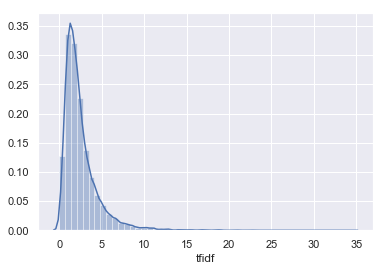

In [56]:
sns.distplot(df2['tfidf'])

##### The distribution of the importance of the words are right-skewed, which means the majority of words in corpus are not good classifiers to differentiate the documents. 
##### And this finding is predictable according to the Zipf's law.

### Latent topics with LDA visualization

In [48]:
# get a list of all the topic scores for each document
scores = [[t[1] for t in topic_corpus[entry]] for entry in range(25000)]

# turn that into a data frame with N rows and K columns, each with the score of the corresponding topic
topic_distros = pd.DataFrame(data=scores, columns=descriptors)

# add the review attitude of each document (so we can aggregate)
topic_distros['attitude'] = df.attitude[:25000]

In [49]:
topic_distros.head()

,"horror, worst","batman, robin","nancy, drew","martial, arts","uninspired, jesus","mst3k, woody","series, worst","eddie, murphy","freddy, baseball","role, performance",attitude
0,0.022685,0.022675,0.022674,0.022676,0.022674,0.022678,0.022683,0.022674,0.022674,0.795906,positive
1,0.013389,0.013385,0.013384,0.013386,0.013384,0.013385,0.013387,0.013384,0.013385,0.879531,positive
2,0.027010,0.027013,0.027005,0.027005,0.027005,0.027008,0.027021,0.027005,0.027010,0.756917,positive
3,0.010783,0.010780,0.010780,0.010780,0.010780,0.010780,0.010784,0.010779,0.010781,0.902974,positive
4,0.014287,0.014286,0.014284,0.014284,0.014285,0.014284,0.558746,0.014284,0.014285,0.326974,positive


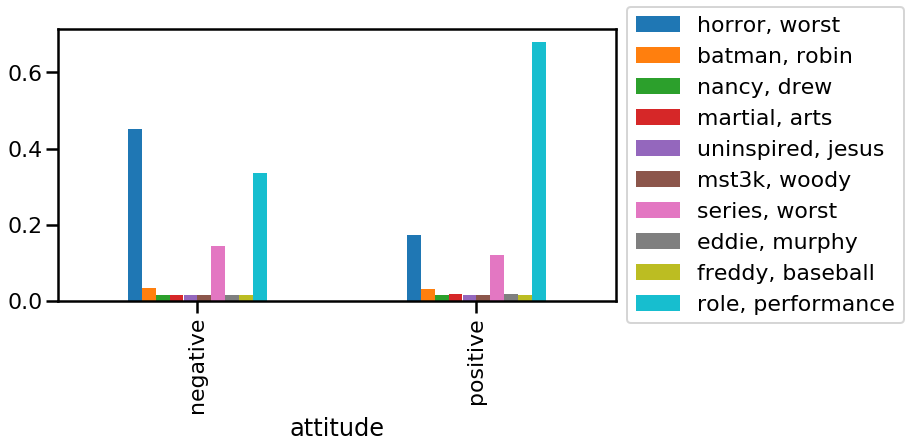

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt # make graphs
import seaborn # make prettier graphs

seaborn.set_context('poster') # use large font

fig, ax = plt.subplots(figsize=(10, 5)) # set graph size
# aggregate topics by review categories
aggregate_by_attitude = topic_distros.groupby(topic_distros.attitude).mean()
# plot the graph
aggregate_by_attitude[descriptors].plot.bar(ax=ax);
# move the legend out
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

##### As is inferred from this barplot, most of the latent topics seems of low frequency. 
##### However, those related to the performance of the actors/actresses and the genres of the films are important influencing factors of the reviewers' attitudes. 
##### The audience are most likely to talk about the casts and their direct feelings, instead of substantial contents of the films, such as the scenarios and characters. 

### Topic modeling with LDA visualization

In [57]:
from sklearn.decomposition import LatentDirichletAllocation
n_topics=3 #num of topics adjusted after plotting
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=50,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda.fit(X2)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=50, mean_change_tol=0.001,
             n_components=3, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [58]:
# We use intertopic distance map to capture the most frequent terms of each topic.
# This is supposed to be an interactive map. Please rerun if it doesn't show up. It might take a long time. Really appreciate your patience:)
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda, X2, vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.124914  0.074860       1        1  37.856360
1      0.023254 -0.119255       2        1  34.945526
2     -0.148169  0.044395       3        1  27.198114, topic_info=      Category         Freq         Term        Total  loglift  logprob
term                                                                   
4502   Default  4758.000000           im  4758.000000  30.0000  30.0000
10061  Default  2751.000000        worst  2751.000000  29.0000  29.0000
5512   Default  5198.000000          man  5198.000000  28.0000  28.0000
9852   Default  4437.000000     watching  4437.000000  27.0000  27.0000
3724   Default  3978.000000        funny  3978.000000  26.0000  26.0000
7840   Default  5261.000000          say  5261.000000  25.0000  25.0000
9813   Default  1830.000000          war  1830.000000  24.0000  24.0000
9955   Default  1962.000000         wife  1962.000000  23.0000  23.0000
10125  Default  3560.000000        young  3560.000000  22.0000  22.0000
4909   Default  2112.000000         john  2112.000000  21.0000  21.0000
8777   Default  1647.000000       stupid  1647.000000  20.0000  20.0000
6713   Default  2192.000000        plays  2192.000000  19.0000  19.0000
659    Default  1630.000000        awful  1630.000000  18.0000  18.0000
7672   Default  3059.000000         role  3059.000000  17.0000  17.0000
4383   Default  3260.000000       horror  3260.000000  16.0000  16.0000
9144   Default  4354.000000        thing  4354.000000  15.0000  15.0000
9843   Default  1498.000000        waste  1498.000000  14.0000  14.0000
4836   Default  3288.000000          ive  3288.000000  13.0000  13.0000
9301   Default  1170.000000         town  1170.000000  12.0000  12.0000
6917   Default  3590.000000       pretty  3590.000000  11.0000  11.0000
9090   Default  1624.000000     terrible  1624.000000  10.0000  10.0000
3833   Default  3202.000000         gets  3202.000000   9.0000   9.0000
4250   Default  2891.000000          hes  2891.000000   8.0000   8.0000
9159   Default  3231.000000      thought  3231.000000   7.0000   7.0000
10048  Default  3417.000000        world  3417.000000   6.0000   6.0000
4399   Default  2030.000000        house  2030.000000   5.0000   5.0000
5953   Default  1002.000000       murder  1002.000000   4.0000   4.0000
10017  Default  2593.000000        woman  2593.000000   3.0000   3.0000
4061   Default  2851.000000          guy  2851.000000   2.0000   2.0000
1018   Default  1751.000000       boring  1751.000000   1.0000   1.0000
...        ...          ...          ...          ...      ...      ...
5512    Topic3  3236.246312          man  5198.368738   0.8281  -5.1082
6525    Topic3   693.473927         paul   827.252521   1.1256  -6.6486
10017   Topic3  1774.649295        woman  2593.751446   0.9225  -5.7090
5735    Topic3   950.737829      michael  1246.336501   1.0313  -6.3331
7672    Topic3  1921.902530         role  3059.029510   0.8372  -5.6292
4399    Topic3  1388.493437        house  2030.581922   0.9219  -5.9543
4250    Topic3  1818.945329          hes  2891.330422   0.8386  -5.6843
2251    Topic3   803.333418     daughter  1015.273826   1.0679  -6.5015
6004    Topic3   653.611401        named   784.598663   1.1194  -6.7078
3833    Topic3  1853.020234         gets  3202.964988   0.7548  -5.6657
3376    Topic3  1170.342000       father  1789.304975   0.8775  -6.1253
10125   Topic3  1862.846625        young  3560.779553   0.6541  -5.6605
6708    Topic3  1444.196965       played  2519.738723   0.7454  -5.9150
9436    Topic3   887.625917        turns  1242.619563   0.9656  -6.4018
7591    Topic3   672.156111      richard   836.272125   1.0836  -6.6798
5134    Topic3  1162.400823        later  2090.639077   0.7150  -6.1321
1344    Topic3  1595.317027         cast  3645.934200   0.4755  -5.8155
3908    Topic3  1247.588359         goes  2401.797379   0.6470  -6.0614
3861    Topic3 

As can be referred from the most frequent terms of each cluster, the 3 latent topics roughly could be:
- negative comments (Topic 1);
- positive comments (Topic 2);
- discriptive comments with no obvious attitudes (Topic 3).

### Dense word embeddings visualization

In [44]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline


def tsne_plot(model, title):
    "Creates an TSNE model and plots it"
    labels = []
    tokens = []
    

    for word in model.wv.index2word:
        tokens.append(model[word])
        labels.append(word)
    
    
    # fit the model into 2 dimensions(n_components=2)
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    
    
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    
    plt.title("Word embedding visualization of {}".format(title),fontsize=24)
    plt.show()

In [45]:
import warnings
warnings.filterwarnings("ignore")

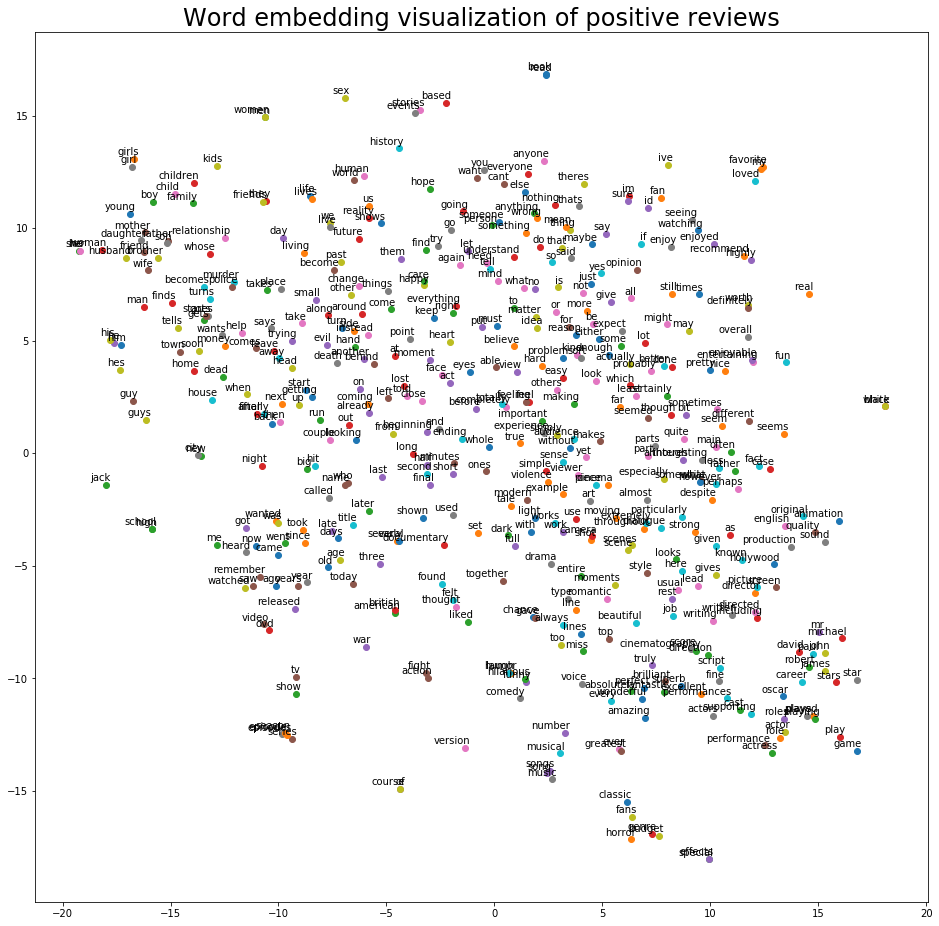

In [46]:
tsne_plot(model_pos, "positive reviews")

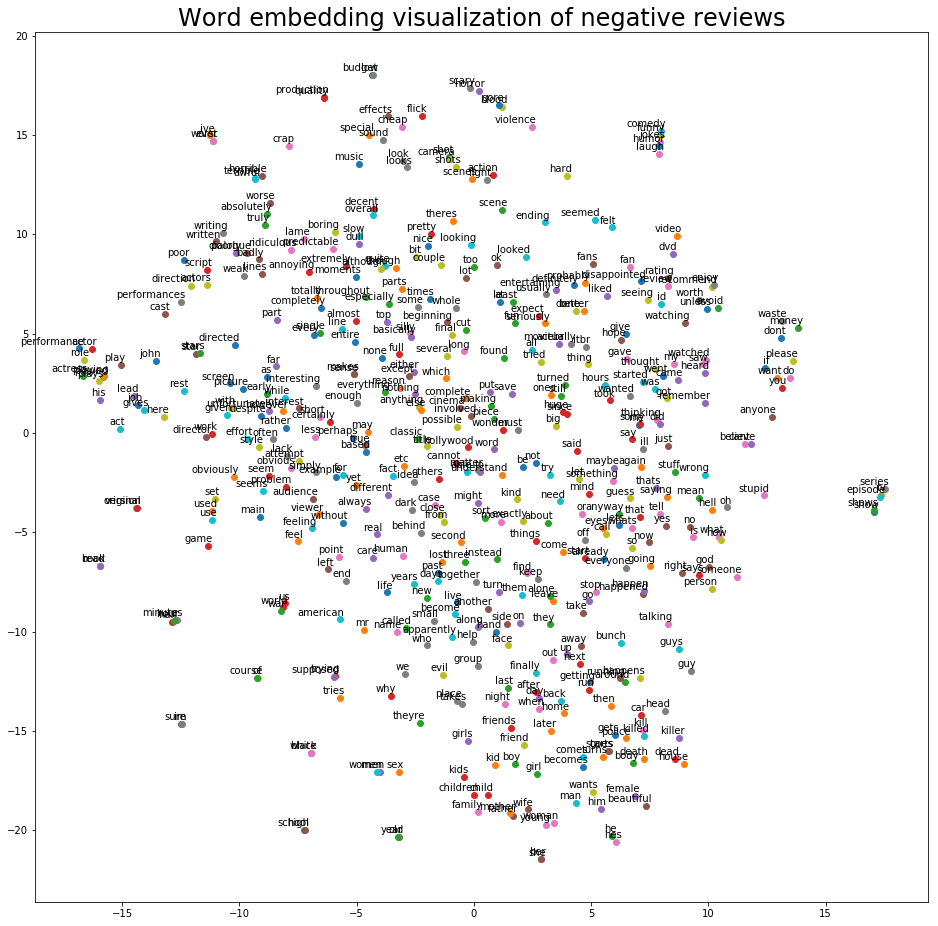

In [47]:
tsne_plot(model_neg, "negative reviews")

### Clustering visualization

In [59]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
import seaborn as sb

sb.set_context('poster')


def plot_vectors(vectors, title='Clustering visualization', labels=None, dimensions=3):
    """
    plot the vectors in 2 or 3 dimensions. If supplied, color them according to the labels
    """
    # set up graph
    fig = plt.figure(figsize=(10,10))

    # create data frame
    df = pd.DataFrame(data={'x':vectors[:,0], 'y': vectors[:,1]})
    # add labels, if supplied
    if labels is not None:
        df['label'] = labels
    else:
        df['label'] = [''] * len(df)

    # assign colors to labels
    cm = plt.get_cmap('tab20b') # choose the color palette
    n_labels = len(df.label.unique())
    label_colors = [cm(1. * i/n_labels) for i in range(n_labels)]
    cMap = colors.ListedColormap(label_colors)
        
    # plot in 3 dimensions
    if dimensions == 3:
        # add z-axis information
        df['z'] = vectors[:,2]
        # define plot
        ax = fig.add_subplot(111, projection='3d')
        frame1 = plt.gca() 
        # remove axis ticks
        frame1.axes.xaxis.set_ticklabels([])
        frame1.axes.yaxis.set_ticklabels([])
        frame1.axes.zaxis.set_ticklabels([])

        # plot each label as scatter plot in its own color
        for l, label in enumerate(df.label.unique()):
            df2 = df[df.label == label]
            ax.scatter(df2['x'], df2['y'], df2['z'], c=label_colors[l], cmap=cMap, edgecolor=None, label=label, alpha=0.3, s=100)
      
    # plot in 2 dimensions
    elif dimensions == 2:
        ax = fig.add_subplot(111)
        frame1 = plt.gca() 
        frame1.axes.xaxis.set_ticklabels([])
        frame1.axes.yaxis.set_ticklabels([])

        for l, label in enumerate(df.label.unique()):
            df2 = df[df.label == label]
            ax.scatter(df2['x'], df2['y'], c=label_colors[l], cmap=cMap, edgecolor=None, label=label, alpha=0.3, s=100)

    else:
        raise NotImplementedError()

    plt.title(title)
    plt.show()

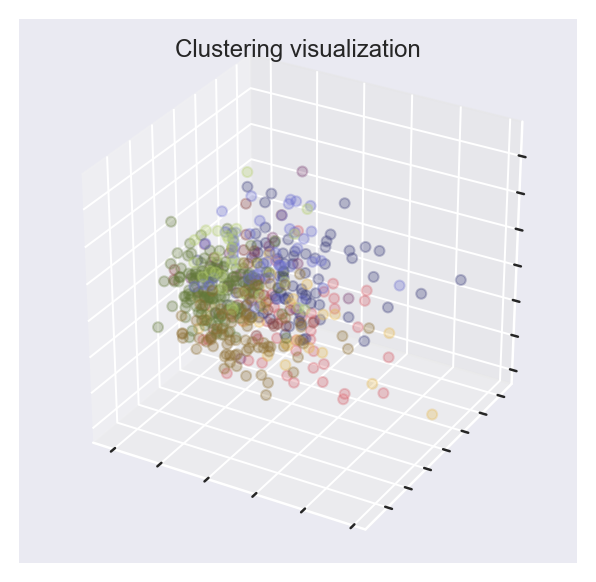

In [60]:
#clustering
svd = TruncatedSVD(n_components=300).fit_transform(X)

plot_sample = np.random.choice(len(svd), replace=False, size=500)
plot_vectors(svd[plot_sample], labels=km.labels_[plot_sample])

##### It's comparatively obvious to see the violet cluster and the green cluster.



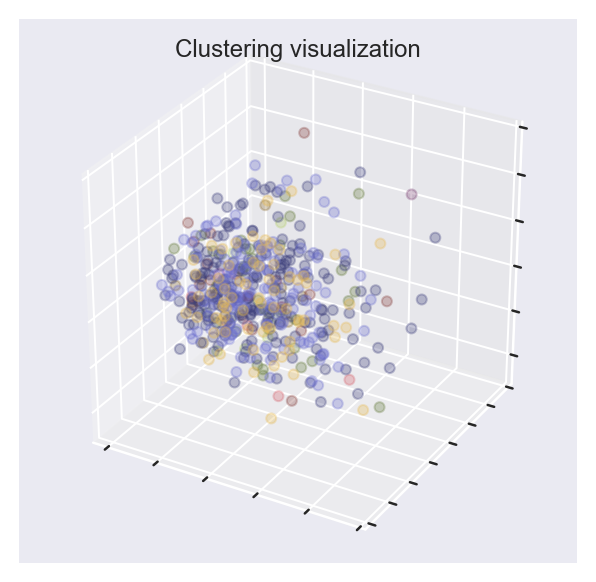

In [61]:
sample = np.random.choice(len(svd), replace=False, size=8000)#change size to 8000
plot_vectors(svd[sample[:500]], labels=agg_sample[:500])

##### Conclusion:
In this project I only performed analysis using the training set, and based my analysis on the provided attitude tag("positive" or "negative") of the reviews. To dig deeper into the dataset in the final project, I will focus more on the 50,000 unsupervised reviews, split the training and the test set, do sentimental analysis classifying the attitude and fit the model into the test set. I will assess and further improve the accuracy of the prediction model. 